In [1]:
# Set path to cil cosmology data 
data_path = "cil_data_path"

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style()

In [3]:
scores = pd.read_csv(os.path.join(data_path, "scored.csv"))
labels = pd.read_csv(os.path.join(data_path,"labeled.csv"))
# extended scores with "usable" field specifying if the image can be treated as a galaxy
# 1 means galaxy-like, 0 means definitely not a galaxy
extended_scores = pd.read_csv(os.path.join(data_path, "extended_scored.csv"))

### Scores distribution

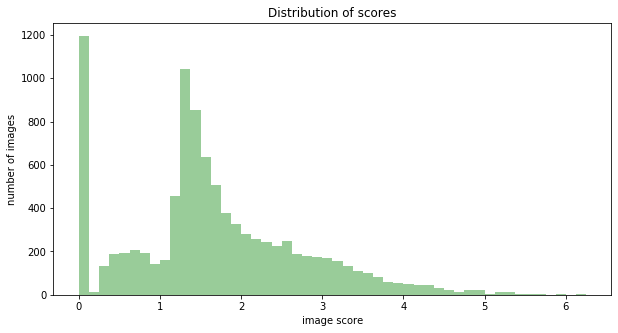

In [4]:
plt.figure(figsize=(10,5))
sns.distplot(a=scores["Actual"], kde=False, color="g")
plt.xlabel("image score")
plt.ylabel("number of images")
plt.title("Distribution of scores")
plt.show()

### Labels distribution

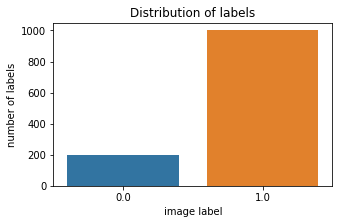

In [5]:
plt.figure(figsize=(5,3))
sns.countplot(labels["Actual"])
plt.xlabel("image label")
plt.ylabel("number of labels")
plt.title("Distribution of labels")
plt.show()

### No scored  and labeled overlap

In [6]:
joined = labels.join(scores, lsuffix="Labels", rsuffix="Scores")
# show that no intersection between scored and labeled examples
print(set(labels.Id).intersection(set(scores.Id)))
print("no intersection between scored and labeled examples")

set()
no intersection between scored and labeled examples


### Scores visual representation

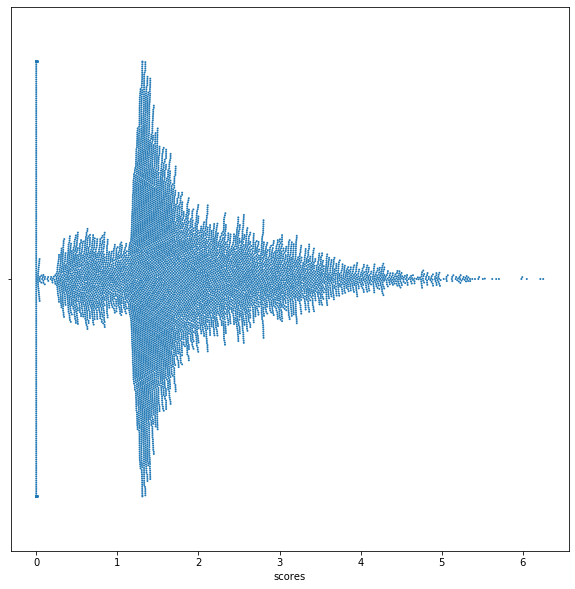

In [7]:
plt.figure(figsize=(10,10))
sns.swarmplot(x=scores["Actual"], size=2)
plt.xlabel("scores")
plt.show()

### Good threshold

In [8]:
# find max score of unusable
unusable = extended_scores[extended_scores["usable"] == 0]

In [9]:
unusable["Actual"].max() 
# Note: images corrupted with noise are marked with usable 
# but still we now know that nonsense images get scores < 0.01

0.0074627157999999985

## See stars

In [10]:
galaxies_ids = labels[labels["Actual"]==1].Id

In [11]:
def get_image_as_numpy(number): # number represents which id
    img = None
    img_id = galaxies_ids[number]
    try: 
        image_path = os.path.join(data_path, "labeled", str(img_id) +  ".png")
        print("Image loaded")
        img_pil = Image.open(image_path)
        img = np.asarray(PIL.Image.open(image_path))
    except IOError: 
        print("Image loading error") 
    return img.copy()

In [12]:
def count_pixel_values(number):
    img = get_image_as_numpy(number)

    count_pixels = [1 for i in range(0,256)]
    for pixel in img.flatten():
        count_pixels[pixel] += 1

    plt.figure(figsize=(7,7))
    plt.title("Log count of pixel values")
    plt.xlabel("Pixel intensity [0, 255]")
    plt.ylabel("Log (#pixels + 1)")
    sns.scatterplot(range(0,256), np.log(count_pixels))
    plt.show()

### Count pixel intensities

Image loaded


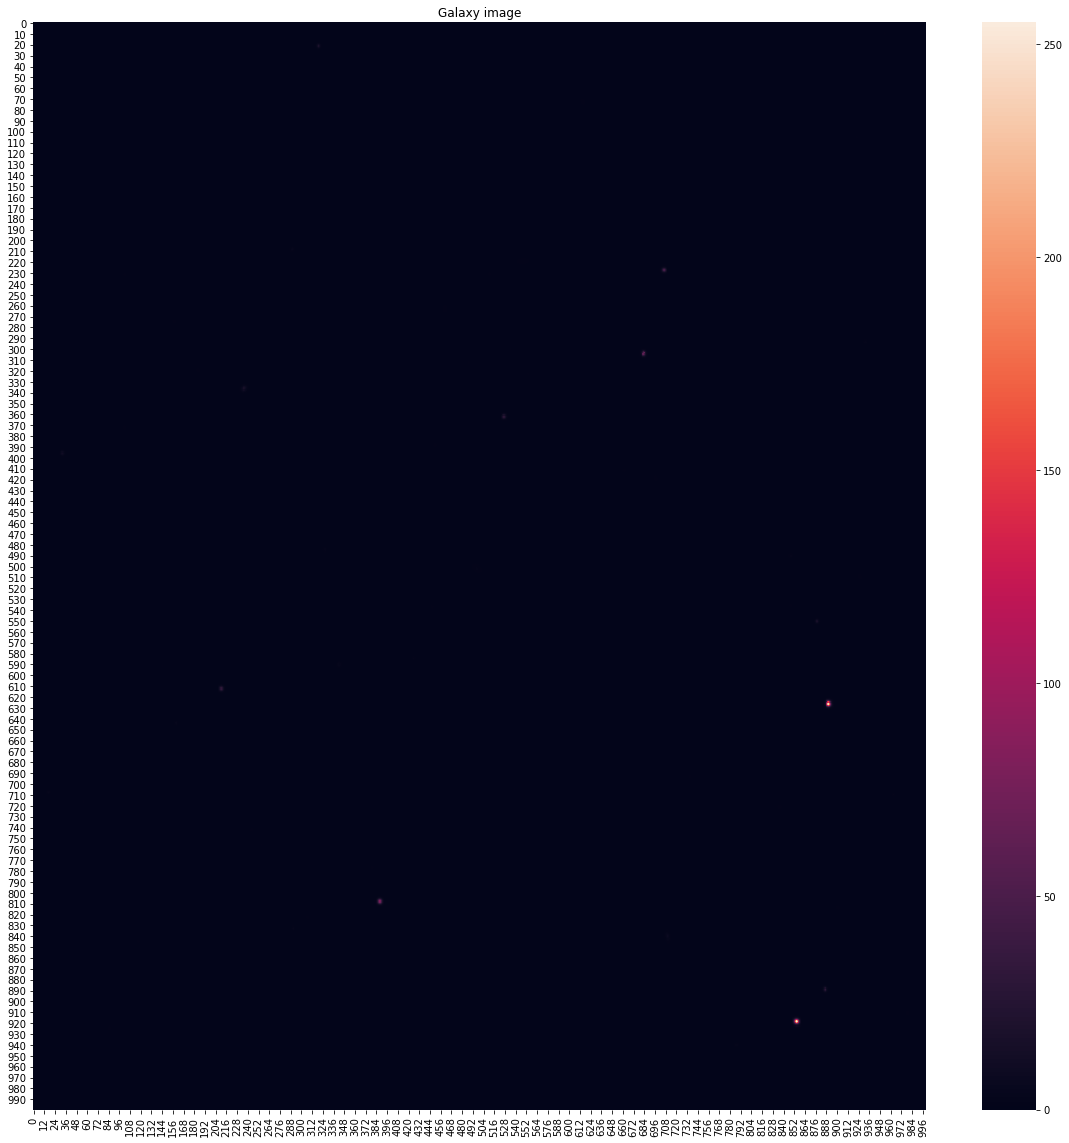

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(get_image_as_numpy(0))
plt.title("Galaxy image")
plt.show()

Image loaded


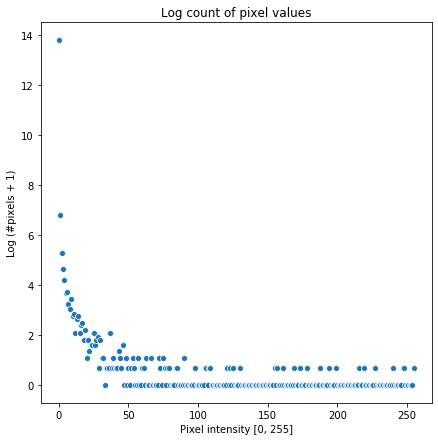

In [14]:
count_pixel_values(0)

Image loaded


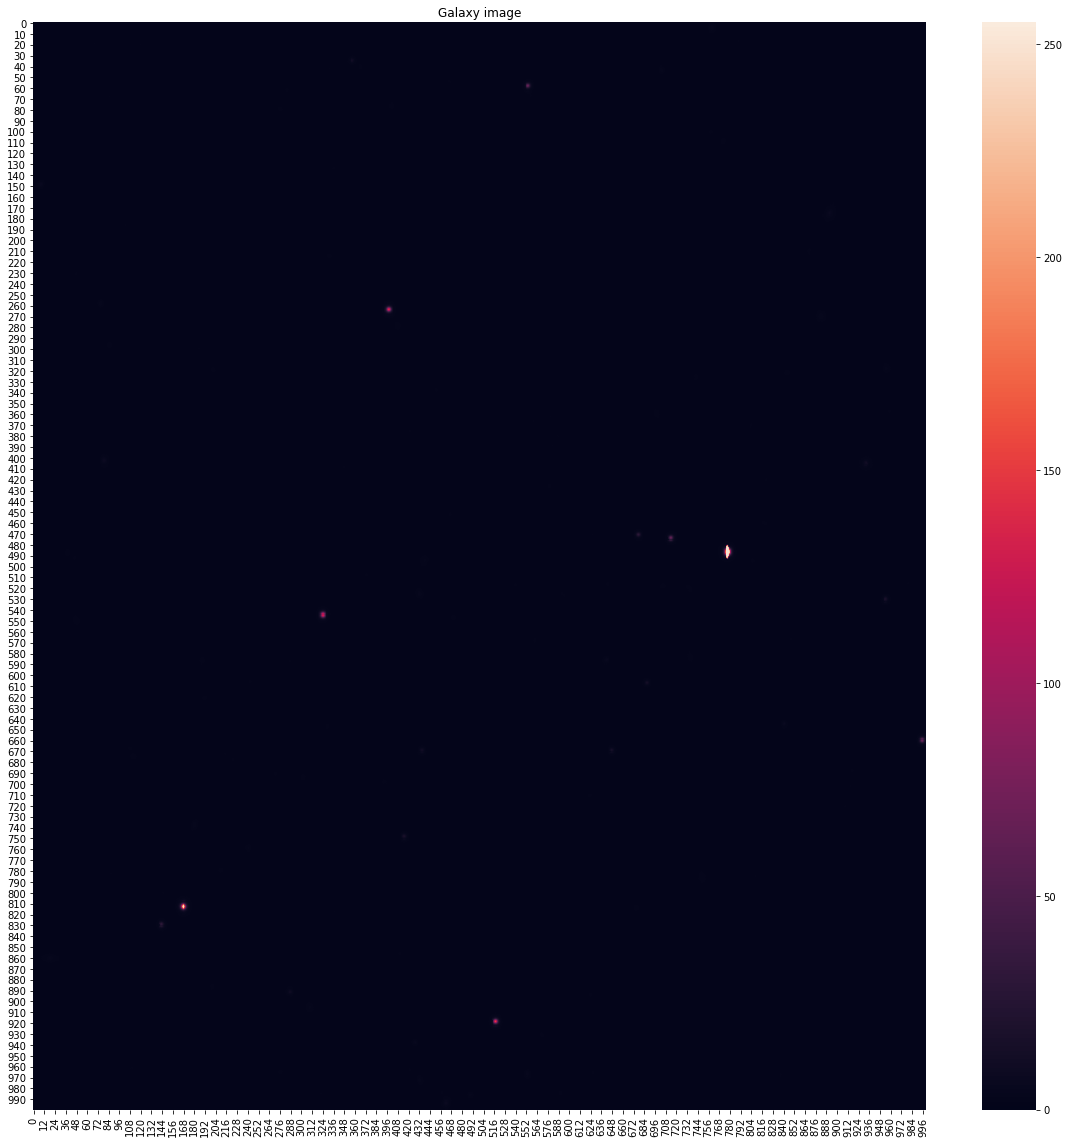

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(get_image_as_numpy(1))
plt.title("Galaxy image")
plt.show()

Image loaded


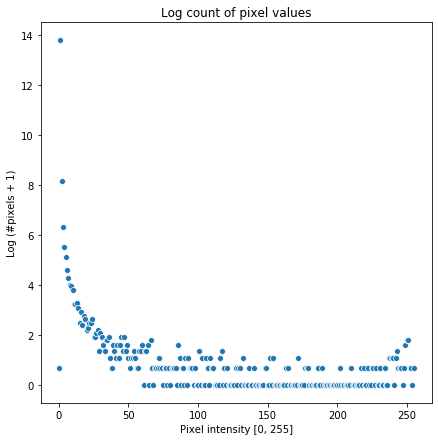

In [16]:
count_pixel_values(1)

### See images in black and white

In [17]:
# set all non-black pixels to white
pixels_0_and_255 =  get_image_as_numpy(0)
pixels_0_and_255[pixels_0_and_255 > 0] = 255

Image loaded


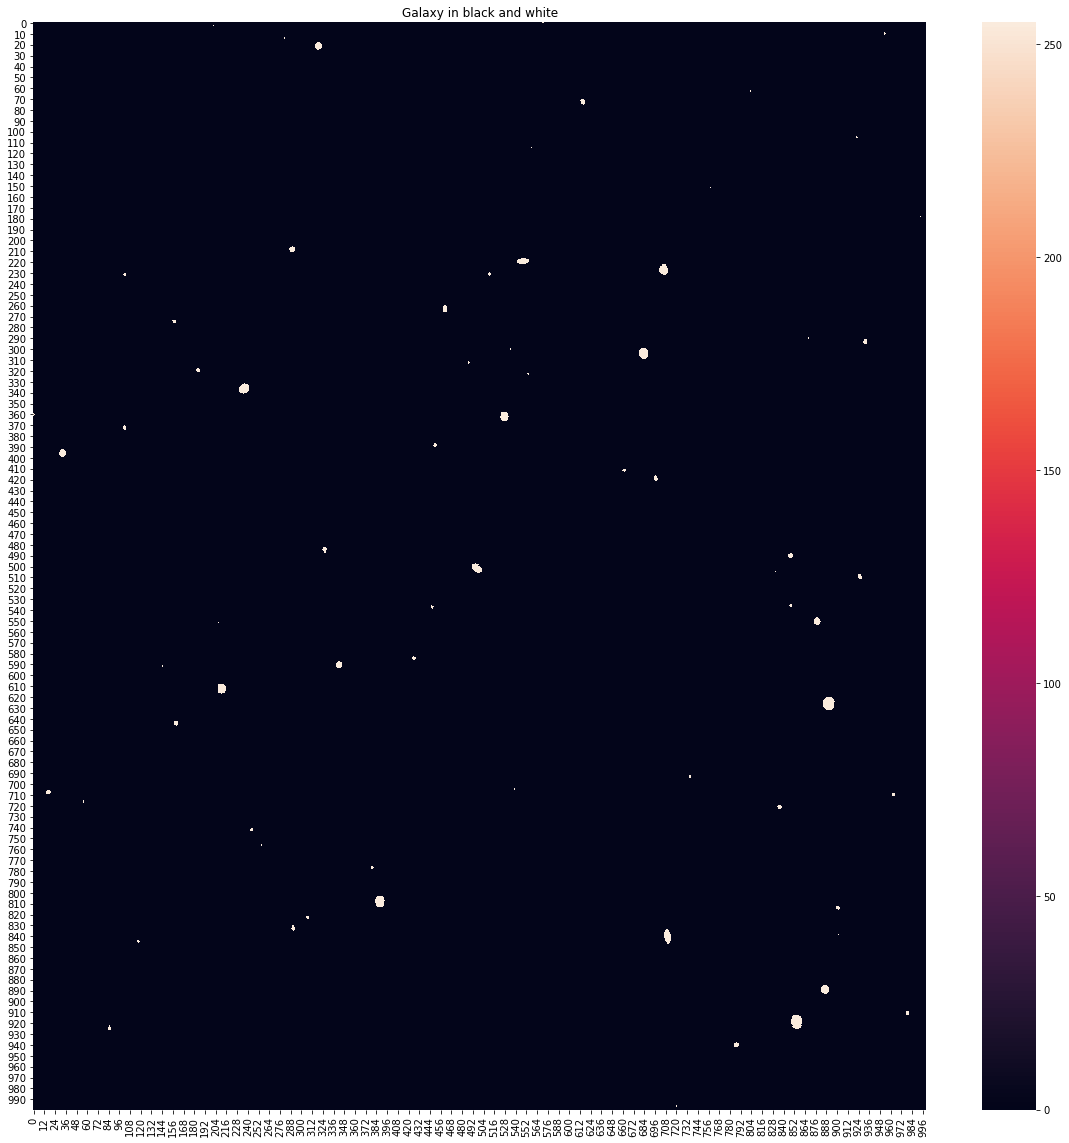

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(pixels_0_and_255)
plt.title("Galaxy in black and white")
plt.show()

Image loaded


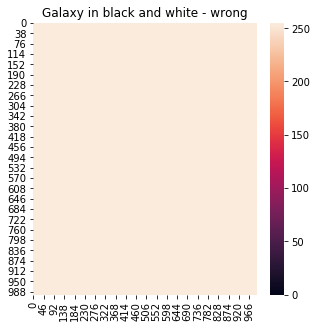

In [19]:
# set all non-black pixels to white
# WARNING: sometimes (for this image) there is a shift and background has colour 001 (and not black 000)
pixels_0_and_255 =  get_image_as_numpy(1)
pixels_0_and_255[pixels_0_and_255 > 0] = 255

plt.figure(figsize=(5,5))
sns.heatmap(pixels_0_and_255)
plt.title("Galaxy in black and white - wrong")
plt.show()

Image loaded


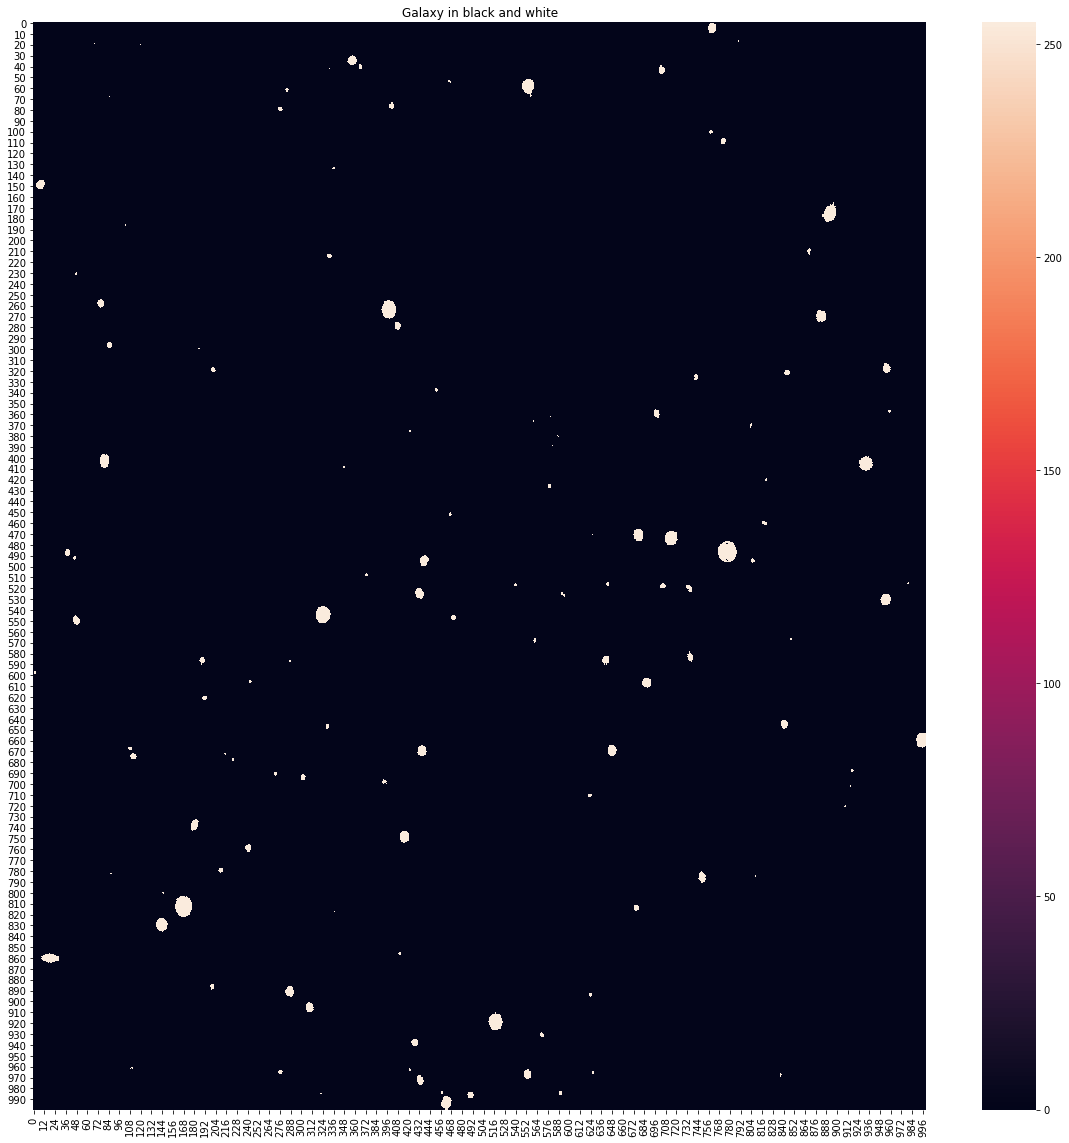

In [20]:
# set all pixels > 001 to white
# sometimes (for this image) there is a shift and background has colour 001 (and not black 000)
# solution: subtract mean first
pixels_0_and_255 =  get_image_as_numpy(1)
pixels_0_and_255 = np.maximum(0, pixels_0_and_255 - np.mean(pixels_0_and_255 + 0.1))
pixels_0_and_255[pixels_0_and_255 > 0] = 255

plt.figure(figsize=(20,20))
sns.heatmap(pixels_0_and_255)
plt.title("Galaxy in black and white")
plt.show()